### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

# <font color='blue'> Project 2 : Buzz Prediction on Twitter
#### Regression task: Prediction of buzz value for Twitter.Data dataset. 




#### Libraries imported for all the model and plots. 

#### Inline plotting of graph is being used

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression as lm
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from  sklearn.preprocessing import PolynomialFeatures
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import make_pipeline
import warnings
from scipy.stats import mstats
%matplotlib inline 
pd.set_option('display.max_colwidth',-1)
warnings.filterwarnings('ignore')


C:\Users\Apurva Sinha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Twitter Data used for Regression task of dependent variable : buzz

#### Reading lines from Twitter.data file into data frame twitter_data and replacing columns into new ones.

In [2]:
twitter_data = pd.read_csv('Twitter.data')
twitter_data.columns=('NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6',
                      'AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6',
                      'AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6',
                      'BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6',
                      'NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6',
                      'AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4',
                      'AS(NAC)_5','AS(NAC)_6',
                      'CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6',
                      'AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6',
                      'NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6',
                      'ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6',
                      'NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','buzz'
                      )
print(twitter_data.head(4))

twitter_data.shape

   NCD_0  NCD_1  NCD_2  NCD_3  NCD_4  NCD_5  NCD_6  AI_0  AI_1  AI_2  ...   \
0  2      1      0      0      0      0      4      2     1     0     ...    
1  1      0      0      0      0      4      1      1     0     0     ...    
2  1      0      0      1      0      0      1      1     0     0     ...    
3  0      1      0      0      1      2      3      0     1     0     ...    

   ADL_5  ADL_6  NAD_0  NAD_1  NAD_2  NAD_3  NAD_4  NAD_5  NAD_6  buzz  
0  0.0    1.0    2      1      0      0      0      0      4      0.5   
1  1.0    1.0    1      0      0      0      0      4      1      0.0   
2  0.0    1.0    1      0      0      1      0      0      1      2.5   
3  1.0    1.0    0      1      0      0      1      2      3      0.5   

[4 rows x 78 columns]


(583249, 78)

#### Exploring dataset

In [3]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583249 entries, 0 to 583248
Data columns (total 78 columns):
NCD_0        583249 non-null int64
NCD_1        583249 non-null int64
NCD_2        583249 non-null int64
NCD_3        583249 non-null int64
NCD_4        583249 non-null int64
NCD_5        583249 non-null int64
NCD_6        583249 non-null int64
AI_0         583249 non-null int64
AI_1         583249 non-null int64
AI_2         583249 non-null int64
AI_3         583249 non-null int64
AI_4         583249 non-null int64
AI_5         583249 non-null int64
AI_6         583249 non-null int64
AS(NA)_0     583249 non-null float64
AS(NA)_1     583249 non-null float64
AS(NA)_2     583249 non-null float64
AS(NA)_3     583249 non-null float64
AS(NA)_4     583249 non-null float64
AS(NA)_5     583249 non-null float64
AS(NA)_6     583249 non-null float64
BL_0         583249 non-null float64
BL_1         583249 non-null float64
BL_2         583249 non-null float64
BL_3         583249 non-null 

In [4]:
twitter_data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,buzz
0,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
1,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
2,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
3,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5
4,1,0,0,1,2,3,0,1,0,0,...,1.0,0.0,1,0,0,1,2,3,0,1.0


#### Preprocessing of data:
Check for missing values


In [5]:
print(twitter_data.describe())
print(twitter_data.isnull().sum())

               NCD_0          NCD_1          NCD_2          NCD_3  \
count  583249.000000  583249.000000  583249.000000  583249.000000   
mean   140.339881     136.770378     159.679545     181.592402      
std    431.772970     432.305464     502.057815     574.884157      
min    0.000000       0.000000       0.000000       0.000000        
25%    3.000000       3.000000       4.000000       4.000000        
50%    18.000000      17.000000      21.000000      24.000000       
75%    104.000000     100.000000     115.000000     131.000000      
max    24210.000000   29574.000000   37505.000000   72366.000000    

               NCD_4          NCD_5          NCD_6           AI_0  \
count  583249.000000  583249.000000  583249.000000  583249.000000   
mean   201.097788     220.175747     219.388589     71.038172       
std    630.448918     669.206442     672.182719     196.876865      
min    0.000000       0.000000       0.000000       0.000000        
25%    5.000000       6.000000   

#### Splitting of dataset into y(buzz) and x variable(77 features)

In [6]:
twitter_data_x = twitter_data.iloc[:,0:77]
twitter_data_y = twitter_data.iloc[:,77:]

print(twitter_data_x.shape)
print(twitter_data_y.shape)


(583249, 77)
(583249, 1)


In [7]:
 _, sample_data, _, sample_target = train_test_split(twitter_data_x, twitter_data_y, shuffle = True, test_size = 0.1)


In [8]:
print(sample_data.shape)   
print(sample_target.shape)

(58325, 77)
(58325, 1)


#### Splitting of dataset into 70 & 30 dataset fro training and test data

In [9]:
twitter_x_train, twitter_x_test, twitter_y_train, twitter_y_test = \
    train_test_split(sample_data, sample_target, random_state = 0,test_size = 0.3)




#### Min max Scaler used for scaling of dataset.
###### StandardScaler removes the mean and scales the data to unit variance. This scaler cannot guarantee balanced feature scales in the presence of outliers. MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]. The outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values. Therefore, we prefer using MinMaxScaler to preserve the effects of outliers.

In [10]:
#scaling using min max scaler
scaler = MinMaxScaler()
twitter_data_x_scaled_train = scaler.fit_transform(twitter_x_train)
twitter_data_x_scaled_test = scaler.transform(twitter_x_test)

In [11]:
print("Size of training set: {}  size of test set:"
      " {}\n".format(twitter_data_x_scaled_train.shape[0], twitter_data_x_scaled_test.shape[0]))

Size of training set: 40827  size of test set: 17498



### KNN regressor with grid search cv parameters

#### Best parameters and best score from gridSearch CV

In [12]:
param_grid_knn = {'n_neighbors': [1,3,5,10,15,17,20,25,27]}
print("Parameter grid:\n{}".format(param_grid_knn))

grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=4, return_train_score=True)


Parameter grid:
{'n_neighbors': [1, 3, 5, 10, 15, 17, 20, 25, 27]}


In [13]:
#KNN regressor

grid_search_knn.fit(twitter_data_x_scaled_train,twitter_y_train)
#r2 score
train_score_array_knn = grid_search_knn.score(twitter_data_x_scaled_train,twitter_y_train)
test_score_array_knn = grid_search_knn.score(twitter_data_x_scaled_test,twitter_y_test)
print("r2/variance Train: ",train_score_array_knn)
print("r2/variance Test: ",test_score_array_knn)

#average score for train and test dataset as per cross validation

print("average of train:",np.mean(grid_search_knn.cv_results_['mean_train_score']))
print("average of test:",np.mean(grid_search_knn.cv_results_['mean_test_score']))

print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

r2/variance Train:  0.9471042219019865
r2/variance Test:  0.9093031741022704
average of train: 0.906530120320482
average of test: 0.8779839236688334
Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.89


#### Capturing the score metrics for all models in report_table

In [14]:
report_table=[]
report_table = report_table + [['knn',
                 grid_search_knn.best_params_,
                 train_score_array_knn, test_score_array_knn ,
                 np.mean(grid_search_knn.cv_results_['mean_train_score']),
                 np.mean(grid_search_knn.cv_results_['mean_test_score'])]]

#### Plotting of train and test score for KNN regressor for multiple n_neighbors values

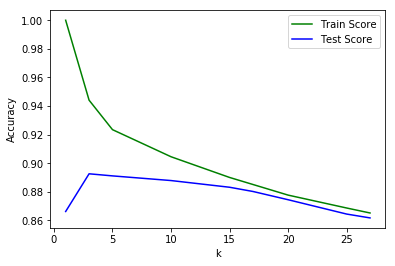

In [15]:
x_axis = [1, 3, 5, 10, 15, 17, 20, 25, 27]
%matplotlib inline
plt.plot(x_axis,grid_search_knn.cv_results_['mean_train_score'], label = 'Train Score', c = 'g')
plt.plot(x_axis, grid_search_knn.cv_results_['mean_test_score'], label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

### Linear regression using cross validation

In [16]:

lreg = lm()
scores_train = cross_val_score(lreg, twitter_data_x_scaled_train, twitter_y_train, cv=4,scoring='r2')
scores_test = cross_val_score(lreg, twitter_data_x_scaled_test, twitter_y_test, cv=4,scoring='r2')

print("Average cross-validation score Train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score Test: {:.2f}".format(scores_test.mean()))


Average cross-validation score Train: 0.85
Average cross-validation score Test: 0.94


In [17]:
lreg.fit(twitter_data_x_scaled_train, twitter_y_train)
#r2 score

train_score_array_linear = lreg.score(twitter_data_x_scaled_train,twitter_y_train)
test_score_array_linear = lreg.score(twitter_data_x_scaled_test,twitter_y_test)
print("r2/variance Train: ",train_score_array_linear)
print("r2/variance Test: ",test_score_array_linear)

r2/variance Train:  0.9342599330318536
r2/variance Test:  0.9316085881504872


In [18]:
report_table = report_table+[['Linear regression',
                              "NA" ,
                              train_score_array_linear ,test_score_array_linear ,
                              scores_train.mean(),scores_test.mean()]]

[1 2 3 4]


Text(0,0.5,'cross validation score')

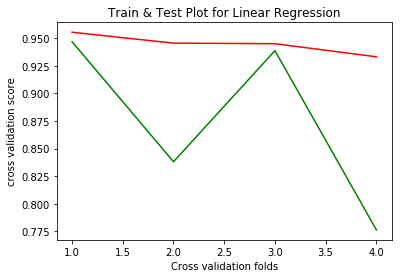

In [52]:
cv = np.arange(1,5)
print(cv)
plt.plot(cv,scores_train, c= 'r')
plt.plot(cv,scores_test, c= 'g')
plt.title("Train & Test Plot for Linear Regression")
plt.xlabel("Cross validation folds")
plt.ylabel("cross validation score")

### Ridge regression with GridSearchCV

#### Finding best parameters and appending into report table

In [19]:

#ridge
param_grid_ridge = {'alpha': [0.01, 0.05,0.1,1,0.001,10],
                    'max_iter': [5,10],
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']}
print("Parameter grid:\n{}".format(param_grid_ridge))

grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=4, return_train_score=True)

grid_search_ridge.fit(twitter_data_x_scaled_train,twitter_y_train)
twitter_y_test_ridge = grid_search_ridge.predict(twitter_data_x_scaled_test)
#r2 score

train_score_array_ridge = grid_search_ridge.score(twitter_data_x_scaled_train,twitter_y_train)
test_score_array_ridge = grid_search_ridge.score(twitter_data_x_scaled_test,twitter_y_test)
print("r2/variance Train: ",train_score_array_ridge)
print("r2/variance Test: ",test_score_array_ridge)
#average score for train and test dataset as per cross validation

print("average of train:",np.mean(grid_search_ridge.cv_results_['mean_train_score']))
print("average of test:",np.mean(grid_search_ridge.cv_results_['mean_test_score']))

print("\nBest parameters: {}".format(grid_search_ridge.best_params_))
print("\nBest cross-validation score: {:.2f}".format(grid_search_ridge.best_score_))

Parameter grid:
{'alpha': [0.01, 0.05, 0.1, 1, 0.001, 10], 'max_iter': [5, 10], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']}
r2/variance Train:  0.864233917175519
r2/variance Test:  0.8971344507623248
average of train: 0.8883694925909748
average of test: 0.8466270983455082

Best parameters: {'alpha': 0.001, 'max_iter': 5, 'solver': 'sag'}

Best cross-validation score: 0.86


In [20]:
report_table = report_table+[['Ridge regression',
                              grid_search_ridge.best_params_,
                              train_score_array_ridge ,test_score_array_ridge,
                              np.mean(grid_search_ridge.cv_results_['mean_train_score']),np.mean(grid_search_ridge.cv_results_['mean_test_score'])]]

### Lasso regression with GridSearchCV

#### Selecting best parameters for lasso from gridsearchCV

In [21]:
#lasso
param_grid_lasso = {'alpha': [0.01, 0.05,0.1,0.001,10],
                    'max_iter': [50,100]}
print("Parameter grid:\n{}".format(param_grid_lasso))

grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=4, return_train_score=True)

grid_search_lasso.fit(twitter_data_x_scaled_train,twitter_y_train)
twitter_y_test_lasso = grid_search_lasso.predict(twitter_data_x_scaled_test)
#r2_Score
train_score_array_lasso = grid_search_lasso.score(twitter_data_x_scaled_train,twitter_y_train)
test_score_array_lasso = grid_search_lasso.score(twitter_data_x_scaled_test,twitter_y_test)
print("r2/variance Train: ",train_score_array_lasso)
print("r2/variance Test: ",test_score_array_lasso)

#average score for train and test dataset as per cross validation

print("average of train:",np.mean(grid_search_lasso.cv_results_['mean_train_score']))
print("average of test:",np.mean(grid_search_lasso.cv_results_['mean_test_score']))

print("\nBest parameters: {}".format(grid_search_lasso.best_params_))
print("\nBest cross-validation score: {:.2f}".format(grid_search_lasso.best_score_))


Parameter grid:
{'alpha': [0.01, 0.05, 0.1, 0.001, 10], 'max_iter': [50, 100]}
r2/variance Train:  0.9299434489829134
r2/variance Test:  0.9334448780177719
average of train: 0.8229340793660185
average of test: 0.7569562482429353

Best parameters: {'alpha': 0.01, 'max_iter': 100}

Best cross-validation score: 0.86


In [22]:
report_table = report_table+[['Lasso regression',
                              grid_search_lasso.best_params_ ,
                              train_score_array_lasso,test_score_array_lasso,
                              np.mean(grid_search_lasso.cv_results_['mean_train_score']),
                              np.mean(grid_search_lasso.cv_results_['mean_test_score'])]]

### SGD Regressor with GridSearchCV parameters

#### Finding best parameters and appending the value to report_table

In [23]:
#sgd regressor
param_grid_sgd = {'penalty': ['l1','l2'],
                  'alpha': [0.01, 0.05, 0.1, 0.001, 10],
                  'learning_rate': ['constant','optimal','invscaling']
                  }
print("Parameter grid:\n{}".format(param_grid_sgd))

grid_search_sgd = GridSearchCV(SGDRegressor(), param_grid_sgd, cv=4, return_train_score=True)

grid_search_sgd.fit(twitter_data_x_scaled_train,twitter_y_train)
twitter_y_test_sgd = grid_search_sgd.predict(twitter_data_x_scaled_test)
#r2 score
train_score_array_sgd = grid_search_sgd.score(twitter_data_x_scaled_train, twitter_y_train)
test_score_array_sgd = grid_search_sgd.score(twitter_data_x_scaled_test, twitter_y_test)
print("r2/variance Train: ",train_score_array_sgd)
print("r2/variance Test: ",test_score_array_sgd)

#average score for train and test dataset as per cross validation

print("average of train:",np.mean(grid_search_sgd.cv_results_['mean_train_score']))
print("average of test:",np.mean(grid_search_sgd.cv_results_['mean_test_score']))

print("\nBest parameters: {}".format(grid_search_sgd.best_params_))
print("\nBest cross-validation score: {:.2f}".format(grid_search_sgd.best_score_))


Parameter grid:
{'penalty': ['l1', 'l2'], 'alpha': [0.01, 0.05, 0.1, 0.001, 10], 'learning_rate': ['constant', 'optimal', 'invscaling']}
r2/variance Train:  0.8527248209881919
r2/variance Test:  0.881581691016439
average of train: -113452550274460.23
average of test: -116979090071649.98

Best parameters: {'alpha': 0.001, 'learning_rate': 'constant', 'penalty': 'l1'}

Best cross-validation score: 0.83


In [24]:
report_table = report_table+[['SGD regressor',
                              grid_search_sgd.best_params_,
                              train_score_array_sgd,test_score_array_sgd,
                              np.mean(grid_search_sgd.cv_results_['mean_train_score']),
                              np.mean(grid_search_sgd.cv_results_['mean_test_score'])]]

### Polynomial Regression with GridSearchCV 

#### Finding best parameters and appending metrics into report_table

##### Plotting the distribution of x and y values

In [25]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         lm(**kwargs))

Text(0.5,1,'NCD_0')

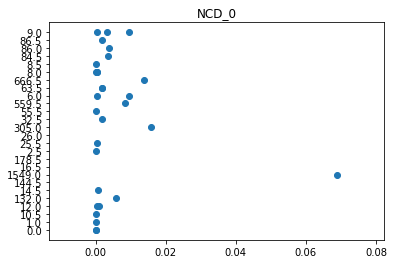

In [26]:
#plot for NCD_0 against first 30 records of y_train
X_train_1 = twitter_data_x_scaled_train[0:30,0].reshape(-1,1)
plt.scatter(X_train_1,twitter_y_train[0:30])
plt.title("NCD_0")

In [27]:
#degrees from 1 to 3
param_poly = {'polynomialfeatures__degree': np.arange(1,3)
              }

grid_search_poly = GridSearchCV(PolynomialRegression(), param_poly, cv=4)
grid_search_poly.fit(twitter_data_x_scaled_train, twitter_y_train)
#r2 score
train_score_array_poly = grid_search_poly.score(twitter_data_x_scaled_train, twitter_y_train)
test_score_array_poly = grid_search_poly.score(twitter_data_x_scaled_test, twitter_y_test)
print("r2/variance Train: ",train_score_array_poly)
print("r2/variance Test: ",test_score_array_poly)
#average score for train and test dataset as per cross validation

print("average of train:",np.mean(grid_search_poly.cv_results_['mean_train_score']))
print("average of test:",np.mean(grid_search_poly.cv_results_['mean_test_score']))

print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly.best_score_))



r2/variance Train:  0.9342599330318536
r2/variance Test:  0.9316085881504866
average of train: 0.9617237881356712
average of test: -34.7193970649792
Best parameters: {'polynomialfeatures__degree': 1}
Best cross-validation score: 0.85


#### Plot for train and test scores of polynomial regression

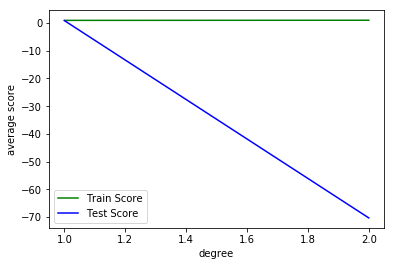

In [28]:
x_axis = range(1,3)
%matplotlib inline

plt.plot(x_axis, grid_search_poly.cv_results_['mean_train_score'], c = 'g', label = 'Train Score')
plt.plot(x_axis, grid_search_poly.cv_results_['mean_test_score'], c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('average score')
plt.legend()

In [29]:
report_table = report_table+[['Polynomial regression',
                              grid_search_poly.best_params_,
                              train_score_array_poly,test_score_array_poly,
                              np.mean(grid_search_poly.cv_results_['mean_train_score']),
                              np.mean(grid_search_poly.cv_results_['mean_test_score'])]]

### Decision tree with GridSearchCv parameters

#### Finding best parameters and appending metrics into report_table

In [30]:
#decision tree
n_features = 77
param_grid_tree = {'max_depth': [3,5,8,15],
                  'min_samples_split': [2,4,6,10],
                  'min_samples_leaf': [2,4,6,10],
                  'max_features': ['auto','sqrt','log2'],
                  'max_leaf_nodes': [5,10,15]
              }
print("Parameter grid:\n{}".format(param_grid_tree))

grid_search_tree = GridSearchCV(DecisionTreeRegressor(), param_grid_tree, cv=4, return_train_score=True)
grid_search_tree.fit(twitter_data_x_scaled_train, twitter_y_train)
twitter_y_test_dtree = grid_search_tree.predict(twitter_data_x_scaled_test)

#r2 score
train_score_array_dtree = grid_search_tree.score(twitter_data_x_scaled_train, twitter_y_train)
test_score_array_dtree = grid_search_tree.score(twitter_data_x_scaled_test, twitter_y_test)
print("r2/variance Train: ",train_score_array_dtree)
print("r2/variance Test: ",test_score_array_dtree)
#average score for train and test dataset as per cross validation

print("average of train:",np.mean(grid_search_tree.cv_results_['mean_train_score']))
print("average of test:",np.mean(grid_search_tree.cv_results_['mean_test_score']))

print("\nBest parameters: {}".format(grid_search_tree.best_params_))
print("\nBest cross-validation score: {:.2f}".format(grid_search_tree.best_score_))


Parameter grid:
{'max_depth': [3, 5, 8, 15], 'min_samples_split': [2, 4, 6, 10], 'min_samples_leaf': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'max_leaf_nodes': [5, 10, 15]}
r2/variance Train:  0.9359469184671722
r2/variance Test:  0.9137154057571139
average of train: 0.8692871578476302
average of test: 0.8224517616931997

Best parameters: {'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 15, 'min_samples_leaf': 4, 'min_samples_split': 4}

Best cross-validation score: 0.90


In [31]:
report_table = report_table+[['Decision Tree',
                              grid_search_tree.best_params_,
                              train_score_array_dtree,test_score_array_dtree,
                              np.mean(grid_search_tree.cv_results_['mean_train_score']),
                              np.mean(grid_search_tree.cv_results_['mean_test_score'])]]


### Linear SVR GridSearchCV 

#### Finding best parameters and appending metrics into report_table

In [32]:
#LinearSVR

param_svr = {'C': [0.001, 0.01, 0.1, 1, 10],
              'max_iter': [10,20]
             }
print("Parameter grid:\n{}".format(param_svr))

grid_search_svm_l = GridSearchCV(LinearSVR(), param_svr, cv=4, return_train_score=True)
grid_search_svm_l.fit(twitter_data_x,twitter_data_y)
# evaluate the Linear SVR on parameters
#r2 score
twitter_y_test_lsvr = grid_search_svm_l.predict(twitter_data_x_scaled_train)
train_score_array_lsvr = grid_search_svm_l.score(twitter_data_x_scaled_train, twitter_y_train)
test_score_array_lsvr = grid_search_svm_l.score(twitter_data_x_scaled_test, twitter_y_test)
print("r2/variance Train: ",train_score_array_lsvr)
print("r2/variance Test: ",test_score_array_lsvr)

#average score for train and test dataset as per cross validation

print("average of train:",np.mean(grid_search_svm_l.cv_results_['mean_train_score']))
print("average of test:",np.mean(grid_search_svm_l.cv_results_['mean_test_score']))

print("\nBest parameters: {}".format(grid_search_svm_l.best_params_))
print("\nBest cross-validation score: {:.2f}".format(grid_search_svm_l.best_score_))




Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [10, 20]}
r2/variance Train:  -0.09625680235154
r2/variance Test:  -0.12411089912930694
average of train: 0.7645780019360486
average of test: 0.7662608442587495

Best parameters: {'C': 0.1, 'max_iter': 20}

Best cross-validation score: 0.88


In [33]:
report_table = report_table+[['Linear SVR',
                              grid_search_svm_l.best_params_,
                              train_score_array_lsvr,test_score_array_lsvr,
                              np.mean(grid_search_svm_l.cv_results_['mean_train_score']),
                              np.mean(grid_search_svm_l.cv_results_['mean_test_score'])]]

### Kernel SVR with GridSearchCV

#### Finding best parameters and appending the metrics into report_table

In [34]:
#SVR with kernel
param_ksvr = {'C': [0.001, 0.01, 0.1, 10],
              'gamma': [0.001, 0.01,10]}
print("Parameter grid:\n{}".format(param_ksvr))


grid_search_svm_k = GridSearchCV(SVR(), param_ksvr, cv=4, return_train_score=True)
grid_search_svm_k.fit(twitter_data_x_scaled_train, twitter_y_train)
twitter_y_test_svr = grid_search_svm_k.predict(twitter_data_x_scaled_train)

#r2 score
train_score_array_svr = grid_search_svm_k.score(twitter_data_x_scaled_train, twitter_y_train)
test_score_array_svr = grid_search_svm_k.score(twitter_data_x_scaled_test, twitter_y_test)
print("r2/variance Train: ",train_score_array_svr)
print("r2/variance Test: ",test_score_array_svr)


#average score for train and test dataset as per cross validation

print("average of train:",np.mean(grid_search_svm_k.cv_results_['mean_train_score']))
print("average of test:",np.mean(grid_search_svm_k.cv_results_['mean_test_score']))

# evaluate the SVR on parameters
print("\nBest parameters: {}".format(grid_search_svm_k.best_params_))
print("\nBest cross-validation score: {:.2f}".format(grid_search_svm_k.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 10], 'gamma': [0.001, 0.01, 10]}
r2/variance Train:  0.28811381454422225
r2/variance Test:  0.40237344530418406
average of train: -0.02898079996287636
average of test: -0.02985579300293115

Best parameters: {'C': 10, 'gamma': 10}

Best cross-validation score: 0.28


### Compiling the report_table into new Data Frame report

In [35]:
report_table = report_table+[['SVR with kernel',
                              grid_search_svm_k.best_params_,
                              train_score_array_svr,test_score_array_svr,
                              np.mean(grid_search_svm_k.cv_results_['mean_train_score']),
                              np.mean(grid_search_svm_k.cv_results_['mean_test_score'])]]

In [36]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model Best parameter', 'Train r2 score', 'Test r2 score',
                                              'Train average score', 'Test average score'])
report.index = report['Model name']

report


,Model name,Model Best parameter,Train r2 score,Test r2 score,Train average score,Test average score
Model name,,,,,,
knn,knn,{'n_neighbors': 3},0.947104,0.909303,9.065301e-01,8.779839e-01
Linear regression,Linear regression,NA,0.934260,0.931609,8.546588e-01,9.439975e-01
Ridge regression,Ridge regression,"{'alpha': 0.001, 'max_iter': 5, 'solver': 'sag'}",0.864234,0.897134,8.883695e-01,8.466271e-01
Lasso regression,Lasso regression,"{'alpha': 0.01, 'max_iter': 100}",0.929943,0.933445,8.229341e-01,7.569562e-01
SGD regressor,SGD regressor,"{'alpha': 0.001, 'learning_rate': 'constant', 'penalty': 'l1'}",0.852725,0.881582,-1.134526e+14,-1.169791e+14
Polynomial regression,Polynomial regression,{'polynomialfeatures__degree': 1},0.934260,0.931609,9.617238e-01,-3.471940e+01
Decision Tree,Decision Tree,"{'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 15, 'min_samples_leaf': 4, 'min_samples_split': 4}",0.935947,0.913715,8.692872e-01,8.224518e-01
Linear SVR,Linear SVR,"{'C': 0.1, 'max_iter': 20}",-0.096257,-0.124111,7.645780e-01,7.662608e-01
SVR with kernel,SVR with kernel,"{'C': 10, 'gamma': 10}",0.288114,0.402373,-2.898080e-02,-2.985579e-02


###### Based on the r2(r-squared) scores(least difference between train and test score/ best score overall) above,Linear and polynomial regression has same values(with degree = 1),So we determine Linear regression to be the best regression model for this dataset. We run this model below with the cross validation

### Best Model based on train and test accuracy


In [37]:
twitter_data_final = pd.read_csv('C:\ML\Project\Twitter.data')
twitter_data_final.columns=('NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6',
                      'AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6',
                      'AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6',
                      'BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6',
                      'NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6',
                      'AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4',
                      'AS(NAC)_5','AS(NAC)_6',
                      'CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6',
                      'AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6',
                      'NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6',
                      'ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6',
                      'NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','buzz'
                      )
print(twitter_data_final.head(4))

twitter_data_final.shape

   NCD_0  NCD_1  NCD_2  NCD_3  NCD_4  NCD_5  NCD_6  AI_0  AI_1  AI_2  ...   \
0  2      1      0      0      0      0      4      2     1     0     ...    
1  1      0      0      0      0      4      1      1     0     0     ...    
2  1      0      0      1      0      0      1      1     0     0     ...    
3  0      1      0      0      1      2      3      0     1     0     ...    

   ADL_5  ADL_6  NAD_0  NAD_1  NAD_2  NAD_3  NAD_4  NAD_5  NAD_6  buzz  
0  0.0    1.0    2      1      0      0      0      0      4      0.5   
1  1.0    1.0    1      0      0      0      0      4      1      0.0   
2  0.0    1.0    1      0      0      1      0      0      1      2.5   
3  1.0    1.0    0      1      0      0      1      2      3      0.5   

[4 rows x 78 columns]


(583249, 78)


#### Reading the full dataset and splitting it to train and test with 70 & 30 ratio

#### Applying MinMaxScaler scaling to standardize the data

In [38]:
twitter_x = twitter_data_final.iloc[:,0:77]
twitter_y = twitter_data_final.iloc[:,77:]

print(twitter_x.shape)
print(twitter_y.shape)

x_train, x_test, y_train, y_test = \
    train_test_split(twitter_x, twitter_y, random_state = 0,test_size = 0.3)
    
#scaling using min max scaler
scaler = MinMaxScaler()
twitter_x_scaled_train = scaler.fit_transform(x_train)
twitter_x_scaled_test = scaler.transform(x_test)

print("Size of training set: {}  size of test set:"
      " {}\n".format(twitter_x_scaled_train.shape[0], twitter_x_scaled_test.shape[0]))

(583249, 77)
(583249, 1)
Size of training set: 408274  size of test set: 174975



In [43]:
#Linear regression

lreg_final = lm()
scores_train_final = cross_val_score(lreg_final, twitter_x_scaled_train, y_train, cv=4,scoring='r2')
scores_test_final = cross_val_score(lreg_final, twitter_x_scaled_test, y_test, cv=4,scoring='r2')

print("Average cross-validation score Train: {:.2f}".format(scores_train_final.mean()))
print("Average cross-validation score Test: {:.2f}".format(scores_test_final.mean()))

Average cross-validation score Train: 0.94
Average cross-validation score Test: 0.87


In [44]:
lreg_final.fit(twitter_x_scaled_train, y_train)
pred_buzz = lreg_final.predict(twitter_x_scaled_test) 
#r2 score

train_score_array_linear = lreg.score(twitter_x_scaled_train,y_train)
test_score_array_linear = lreg.score(twitter_x_scaled_test,y_test)
print("r2/variance Train: ",train_score_array_linear)
print("r2/variance Test: ",test_score_array_linear)

r2/variance Train:  0.9162371679226623
r2/variance Test:  0.8878610910462605


[1 2 3 4]


Text(0,0.5,'cross validation score')

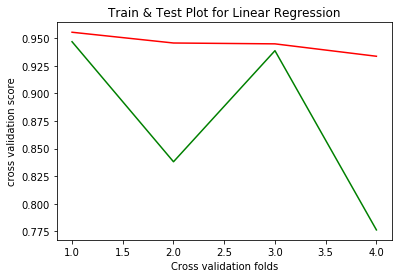

In [51]:
cv = np.arange(1,5)
print(cv)
plt.plot(cv,scores_train_final, c= 'r')
plt.plot(cv,scores_test_final, c= 'g')
plt.title("Train & Test Plot for Linear Regression")
plt.xlabel("Cross validation folds")
plt.ylabel("cross validation score")